# Convolutions

In [1]:
import torch
from torch import nn

from torch.utils.data import default_collate
from typing import Mapping

from miniai.training import *
from miniai.datasets import *

In [2]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl, numpy as np
import pandas as pd,matplotlib.pyplot as plt
from pathlib import Path
from torch import tensor

from torch.utils.data import DataLoader
from typing import Mapping

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['image.cmap'] = 'gray'

In [4]:
path_data = Path('data')
path_gz = path_data/'mnist.pkl.gz'
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])

In [7]:
x_imgs = x_train.view(-1,28,28)
xv_imgs = x_valid.view(-1,28,28)

x_imgs.shape, xv_imgs.shape

(torch.Size([50000, 28, 28]), torch.Size([10000, 28, 28]))

In [8]:
mpl.rcParams["figure.dpi"] = 30

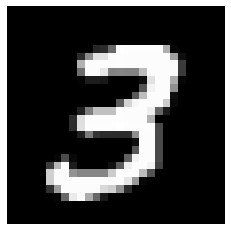

In [17]:
im3 = x_imgs[7]
show_image(im3);

In [18]:
top_edge = tensor([[-1,-1,-1],
                   [0,0,0],
                   [1,1,1]]).float()

top_edge

tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])

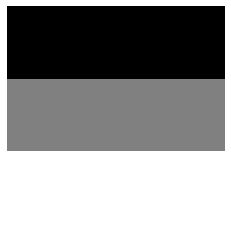

In [20]:
show_image(top_edge);

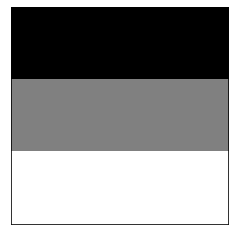

In [19]:
show_image(top_edge, noframe=False);

In [21]:
df = pd.DataFrame(im3[:13, :23])
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),...,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
1,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),...,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
2,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),...,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
3,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),...,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
4,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),...,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.)
5,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),...,tensor(0.4102),tensor(0.9961),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.9883),tensor(0.6797),tensor(0.0234),tensor(0.)
6,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.1680),...,tensor(0.9844),tensor(0.9883),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.6172),tensor(0.0547)
7,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.6953),...,tensor(0.9844),tensor(0.9883),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.2305)
8,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.4258),...,tensor(0.5156),tensor(0.5195),tensor(0.5156),tensor(0.5156),tensor(0.7383),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.9844),tensor(0.2305)
9,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.0156),...,tensor(0.),tensor(0.),tensor(0.),tensor(0.),tensor(0.0547),tensor(0.8828),tensor(0.9844),tensor(0.9844),tensor(0.6719),tensor(0.0273)


In [ ]:
df = pd.DataFrame(np.random.randn(4, 2), columns=['a', 'b'])
>>> df.style.format("{:.2%}")
>>> df['c'] = ['a', 'b', 'c', 'd']
>>> df.style.format({'c': str.upper})

In [31]:
df = pd.DataFrame(im3[:13, :23])
df.style.format("{:.2}").set_properties(**{"font-size":"7pt"}).background_gradient("Greys")
# df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.17,0.41,1.0,0.99,0.99,0.99,0.99,0.99,0.68,0.023,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.54,0.88,0.88,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.62,0.055
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.23
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.98,0.98,0.9,0.52,0.52,0.52,0.52,0.74,0.98,0.98,0.98,0.98,0.23
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016,0.11,0.11,0.094,0.0,0.0,0.0,0.0,0.055,0.88,0.98,0.98,0.67,0.027


In [32]:
im3[3:6,14:17]

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.9961, 0.9883, 0.9883]])

In [33]:
top_edge

tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])

In [34]:
im3[3:6,14:17] * top_edge

tensor([[-0.0000, -0.0000, -0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.9961, 0.9883, 0.9883]])

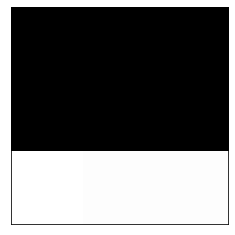

In [39]:
show_image(im3[3:6,14:17] * top_edge, noframe=False);

In [35]:
(im3[3:6,14:17] * top_edge).sum()

tensor(2.9727)

In [36]:
im3[7:10,14:17]

tensor([[0.9883, 0.9844, 0.9844],
        [0.5195, 0.5156, 0.5156],
        [0.0000, 0.0000, 0.0000]])

In [37]:
(im3[7:10,14:17] * top_edge).sum()

tensor(-2.9570)

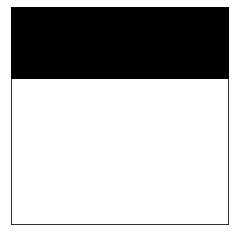

In [40]:
show_image(im3[7:10,14:17] * top_edge, noframe=False);

In [41]:
def apply_kernel(row, col, kernel): return (im3[row-1:row+2,col-1:col+2] * kernel).sum()

In [42]:
apply_kernel(4,15, top_edge)

tensor(2.9727)

In [43]:
[[(i,j) for j in range(5)] for i in range(5)]

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]]

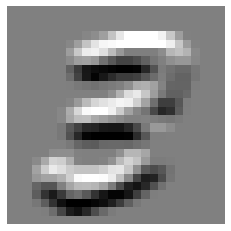

In [48]:
rng = range(1,27)
top_edge3 = tensor([[apply_kernel(i,j,top_edge) for j in rng] for i in rng])
show_image(top_edge3);

In [49]:
left_edge = tensor([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]]).float()

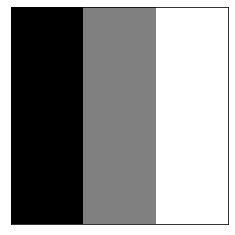

In [50]:
show_image(left_edge, noframe=False);

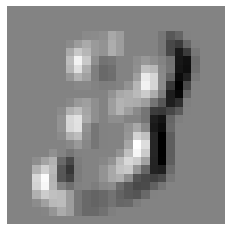

In [51]:
left_edge3 = tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng])
show_image(left_edge3);

## Convolutions in PyTorch

In [52]:
import torch.nn.functional as F
import torch

In [53]:
im3.shape

torch.Size([28, 28])

In [54]:
im3[None,None,:,:].shape

torch.Size([1, 1, 28, 28])

In [56]:
inp = im3[None,None,:,:].float()
inp_unf = F.unfold(inp, (3,3))[0]
inp_unf.shape

torch.Size([9, 676])

In [59]:
left_edge

tensor([[-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.]])

In [60]:
left_edge.view(-1)

tensor([-1.,  0.,  1., -1.,  0.,  1., -1.,  0.,  1.])

In [61]:
w = left_edge.view(-1)
w.shape

torch.Size([9])

In [63]:
out_unf = w@inp_unf
out_unf.shape

torch.Size([676])

In [64]:
out_unf.view(26,26).shape

torch.Size([26, 26])

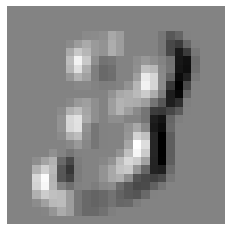

In [65]:
out = out_unf.view(26,26)
show_image(out);

In [66]:
%timeit -n 1 tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng]);

23.5 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
%timeit -n 100 (w@F.unfold(inp, (3,3))[0]).view(26,26);

106 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [75]:
(23.5*(10**-3)) / (106*(10**-6))

221.69811320754718

221.6 faster with matrix multiplication

In [79]:
left_edge[None,None].shape

torch.Size([1, 1, 3, 3])

In [84]:
conv2d = F.conv2d(inp, left_edge[None,None])
conv2d.shape

torch.Size([1, 1, 26, 26])

In [85]:
conv2d.squeeze().shape

torch.Size([26, 26])

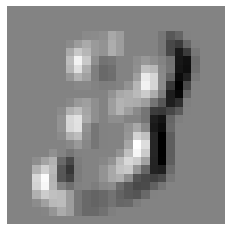

In [86]:
show_image(conv2d.squeeze());

In [87]:
%timeit -n 100 F.conv2d(inp, left_edge[None,None])

65.6 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


`F.conv2d` is about twice as fast a `w@F.unfold`

In [88]:
diag1_edge = tensor([[ 0,-1, 1],
                     [-1, 1, 0],
                     [ 1, 0, 0]]).float()

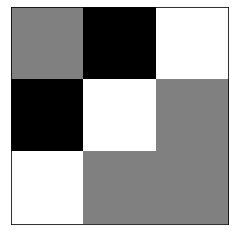

In [89]:
show_image(diag1_edge, noframe=False);

In [90]:
diag2_edge = tensor([[ 1,-1, 0],
                     [ 0, 1,-1],
                     [ 0, 0, 1]]).float()

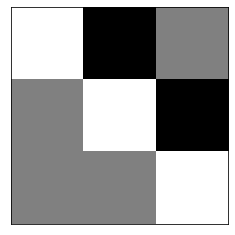

In [91]:
show_image(diag2_edge, noframe=False);

In [92]:
x_imgs.shape

torch.Size([50000, 28, 28])

In [95]:
xb = x_imgs[:16][:,None]
xb.shape

torch.Size([16, 1, 28, 28])

In [96]:
left_edge.shape, top_edge.shape, diag1_edge.shape, diag2_edge.shape

(torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]))

In [97]:
# dim=0 by default #
torch.stack([left_edge, top_edge, diag1_edge, diag2_edge]).shape

torch.Size([4, 3, 3])

In [98]:
torch.stack([left_edge, top_edge, diag1_edge, diag2_edge], dim=1).shape

torch.Size([3, 4, 3])

In [99]:
edge_kernels = torch.stack([left_edge, top_edge, diag1_edge, diag2_edge])[:,None]
edge_kernels.shape

torch.Size([4, 1, 3, 3])

In [100]:
xb.shape

torch.Size([16, 1, 28, 28])

In [101]:
batch_features = F.conv2d(xb, edge_kernels)
batch_features.shape

torch.Size([16, 4, 26, 26])

The output shape shows we gave 64 images in the mini-batch, 4 kernels, and 26×26 edge maps (we started with 28×28 images, but lost one pixel from each side as discussed earlier). We can see we get the same results as when we did this manually:

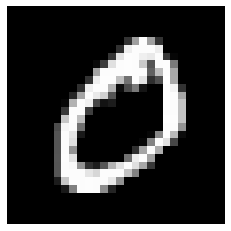

In [102]:
img0 = xb[1,0]
show_image(img0);

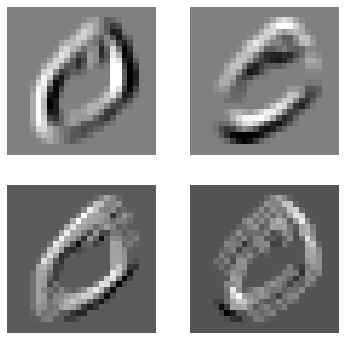

In [103]:
show_images([batch_features[1,i] for i in range(4)])

## Strides and Padding

If we add a kernel of size `ks` by `ks` (with `ks` an odd number), the necessary padding on each side to keep the same shape is `ks//2`.

In [104]:
3/2

1.5

In [106]:
# same as 3 modulus 2.ie. the remainder of 3 divided by 2 #
3//2

1

to get the same shape as the input, we apply padding=1: `(ks=3, ks//2)`

In [107]:
edge_kernels.shape, xb.shape

(torch.Size([4, 1, 3, 3]), torch.Size([16, 1, 28, 28]))

In [108]:
batch_features = F.conv2d(xb, edge_kernels, padding=1)
batch_features.shape

torch.Size([16, 4, 28, 28])

We could move over two pixels after each kernel application. This is known as a stride-2 convolution

In [109]:
batch_features = F.conv2d(xb, edge_kernels, padding=1, stride=2)
batch_features.shape

torch.Size([16, 4, 14, 14])

In [111]:
batch_features = F.conv2d(xb, edge_kernels, padding=1, stride=3)
batch_features.shape

torch.Size([16, 4, 10, 10])

In [118]:
batch_features = F.conv2d(xb, edge_kernels, padding=1, stride=2)
batch_features.shape

torch.Size([16, 4, 14, 14])

## Creating the CNN

In [114]:
n,m = x_train.shape
c = y_train.max()+1
nh = 50

print(f"NumImages:{n} ; Inputs:{m} ; HiddenLayers:{nh} ; Outputs:{c}")

NumImages:50000 ; Inputs:784 ; HiddenLayers:50 ; Outputs:10


In [115]:
# Simple neural net # 
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [123]:
xb.shape, edge_kernels.shape

(torch.Size([16, 1, 28, 28]), torch.Size([4, 1, 3, 3]))

In [127]:
xb.flatten(1).shape

torch.Size([16, 784])

In [128]:
model(xb.flatten(1)).shape

torch.Size([16, 10])

In [124]:
batch_features = F.conv2d(xb, edge_kernels, padding=1, stride=1)
batch_features.shape

torch.Size([16, 4, 28, 28])

In [132]:
con2d_class = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3,padding=1)
con2d_class(xb).shape

torch.Size([16, 10, 28, 28])

Messing with input channels: `in_channels`

In [139]:
con2d_in1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1,padding=1)

print(con2d_in1)
list(con2d_in1.parameters())

Conv2d(1, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[-0.9995]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.3608], requires_grad=True)]

In [142]:
con2d_in2 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=1,padding=1)

print(con2d_in2)
list(con2d_in2.parameters())

Conv2d(2, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[-0.6240]],
 
          [[ 0.6133]]]], requires_grad=True),
 Parameter containing:
 tensor([0.6347], requires_grad=True)]

In [145]:
con2d_in5 = nn.Conv2d(in_channels=5, out_channels=1, kernel_size=1,padding=1)

print(con2d_in5)
list(con2d_in5.parameters())

Conv2d(5, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[-0.3993]],
 
          [[ 0.0918]],
 
          [[-0.4448]],
 
          [[ 0.1193]],
 
          [[-0.3755]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.0543], requires_grad=True)]

Messing with output channels: `out_channels`

In [146]:
con2d_out1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1,padding=1)

print(con2d_out1)
list(con2d_out1.parameters())

Conv2d(1, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[-0.5651]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.0437], requires_grad=True)]

In [147]:
con2d_out2 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=1,padding=1)

print(con2d_out2)
list(con2d_out2.parameters())

Conv2d(1, 2, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[ 0.9683]]],
 
 
         [[[-0.8041]]]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1851, -0.1165], requires_grad=True)]

In [150]:
con2d_out5 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=1,padding=1)

print(con2d_out5)
list(con2d_out5.parameters())

Conv2d(1, 5, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[ 0.4650]]],
 
 
         [[[ 0.3075]]],
 
 
         [[[-0.4712]]],
 
 
         [[[ 0.6590]]],
 
 
         [[[ 0.9827]]]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3537,  0.0617,  0.3004, -0.7868,  0.4154], requires_grad=True)]

Messing with `kernel_size`

In [151]:
con2d_kernel1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1,padding=1)

print(con2d_kernel1)
list(con2d_kernel1.parameters())

Conv2d(1, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[-0.4963]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.0382], requires_grad=True)]

In [152]:
con2d_kernel2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2,padding=1)

print(con2d_kernel2)
list(con2d_kernel2.parameters())

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[ 0.2741,  0.4224],
           [-0.3979, -0.1980]]]], requires_grad=True),
 Parameter containing:
 tensor([0.2612], requires_grad=True)]

In [153]:
con2d_kernel3 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3,padding=1)

print(con2d_kernel3)
list(con2d_kernel3.parameters())

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[-0.2563, -0.0473,  0.0364],
           [-0.1919,  0.1936,  0.2567],
           [-0.0108,  0.0637,  0.1537]]]], requires_grad=True),
 Parameter containing:
 tensor([0.2075], requires_grad=True)]

input:1, output=5, kernal size=3

In [154]:
con2d_i1_o5_k3 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3,padding=1)

print(con2d_i1_o5_k3)
list(con2d_i1_o5_k3.parameters())

Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


[Parameter containing:
 tensor([[[[ 0.2241,  0.2437, -0.3154],
           [ 0.2407,  0.1092, -0.3015],
           [ 0.1053, -0.3156, -0.2122]]],
 
 
         [[[-0.1513, -0.0080, -0.1073],
           [ 0.1416, -0.2294,  0.2691],
           [ 0.2892,  0.3250, -0.0160]]],
 
 
         [[[-0.1865,  0.1786,  0.0892],
           [ 0.1467, -0.1850,  0.1242],
           [-0.1304, -0.2910,  0.3272]]],
 
 
         [[[-0.2089,  0.2714, -0.1249],
           [ 0.2486, -0.0919,  0.3216],
           [-0.1027, -0.0497,  0.2971]]],
 
 
         [[[-0.0241,  0.0042, -0.2703],
           [-0.3049,  0.1254, -0.2169],
           [-0.0236,  0.1857,  0.3078]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.2031,  0.1233, -0.2889,  0.2512,  0.0757], requires_grad=True)]

In [221]:
# input:2, output=5, kernal size=3 #
con2d_i2_o5_k3 = nn.Conv2d(in_channels=2, out_channels=5, kernel_size=3,padding=1)

print(con2d_i2_o5_k3)
print(con2d_i2_o5_k3.weight.shape)
list(con2d_i2_o5_k3.parameters())


Conv2d(2, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([5, 2, 3, 3])


[Parameter containing:
 tensor([[[[ 4.4655e-02,  1.9793e-01,  2.2468e-01],
           [-1.6245e-01, -2.3141e-01,  5.2867e-02],
           [-1.2500e-01, -2.1740e-01, -1.4744e-01]],
 
          [[ 1.5725e-01,  1.7965e-02,  2.9961e-02],
           [ 3.6406e-02,  9.8333e-02,  6.7898e-02],
           [-4.7162e-02,  7.7042e-02,  1.1485e-01]]],
 
 
         [[[-1.4642e-01,  2.0376e-01, -2.0212e-01],
           [-3.2925e-02, -3.4269e-02, -9.8652e-02],
           [ 8.6257e-02,  1.4532e-01,  4.8450e-02]],
 
          [[ 8.0446e-02, -2.7109e-02,  1.6744e-01],
           [-2.0392e-01, -2.4937e-02,  1.1549e-01],
           [ 3.8359e-02, -2.1064e-01, -1.2602e-01]]],
 
 
         [[[ 1.5696e-01,  2.1521e-01,  1.7106e-01],
           [ 2.4462e-02, -2.0545e-01,  2.2059e-02],
           [ 1.9572e-01,  4.5236e-02,  2.2207e-01]],
 
          [[ 1.6846e-01, -1.6003e-01,  4.3262e-02],
           [ 1.2589e-01,  6.8751e-02,  8.0607e-02],
           [ 6.3059e-02,  3.7168e-02,  1.9403e-01]]],
 
 
         [[[-2

In [156]:
def con2d_params(in_channels=1, out_channels=1, kernel_size=1, **kwargs):
    out = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size)

    print(out)
    print(list(out.parameters()))

In [157]:
con2d_params(1,5, 3)

Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))
[Parameter containing:
tensor([[[[ 0.1576, -0.0662, -0.0428],
          [-0.0492, -0.0476,  0.1463],
          [-0.1440,  0.0049, -0.0061]]],


        [[[ 0.2075, -0.0832,  0.1744],
          [-0.3109, -0.1999, -0.2606],
          [-0.0051,  0.0075,  0.2991]]],


        [[[-0.0805, -0.1200,  0.2162],
          [ 0.1532, -0.2622,  0.2999],
          [-0.1374,  0.1973,  0.2695]]],


        [[[ 0.2020,  0.3210, -0.1790],
          [-0.2120,  0.2185, -0.2269],
          [ 0.3325,  0.0033,  0.1968]]],


        [[[-0.0107, -0.0893, -0.2542],
          [-0.1497, -0.2868, -0.1826],
          [-0.0451,  0.3084,  0.1300]]]], requires_grad=True), Parameter containing:
tensor([ 0.2322,  0.1379, -0.1850, -0.2410,  0.0306], requires_grad=True)]


In [160]:
con2d_t = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1,padding=1)

list(con2d_t.parameters())

[Parameter containing:
 tensor([[[[-0.5368]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.0971], requires_grad=True)]

In [165]:
list(con2d_t.named_parameters())

[('weight',
  Parameter containing:
  tensor([[[[-0.5368]]]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([-0.0971], requires_grad=True))]

In [166]:
broken_cnn = nn.Sequential(
    nn.Conv2d(1,30, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(30,10, kernel_size=3, padding=1)
)

In [167]:
broken_cnn

Sequential(
  (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(30, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [168]:
xb.shape

torch.Size([16, 1, 28, 28])

In [169]:
broken_cnn(xb).shape

torch.Size([16, 10, 28, 28])

In [178]:
def conv(ni,nf, ks=3, stride=2, act=True):
    res = nn.Conv2d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

Refactoring parts of your neural networks like this makes it much less likely you'll get errors due to inconsistencies in your architectures, and makes it more obvious to the reader which parts of your layers are actually changing.

In [190]:
simple_cnn = nn.Sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,16),           #2x2
    conv(16,10, act=False), #1x1
    nn.Flatten(),
)

simple_cnn

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (1): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (3): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (4): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): Flatten(start_dim=1, end_dim=-1)
)

In [191]:
xb.shape, simple_cnn(xb).shape

(torch.Size([16, 1, 28, 28]), torch.Size([16, 10]))

In [202]:
x_imgs = x_train.view(-1,1,28,28)
xv_imgs = x_valid.view(-1,1,28,28)
train_ds,valid_ds = Dataset(x_imgs, y_train), Dataset(xv_imgs, y_valid)

In [213]:
# for apple silicone #
# def_device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

def_device = 'cuda' if torch.cuda.is_available() else 'cpu'

def to_device(x, device=def_device):
    if isinstance(x, torch.Tensor): return x.to(device)
    if isinstance(x, Mapping): return {k:v.to(device) for k,v in x.items()}
    return type(x)(to_device(o, device) for o in x)

def collate_device(b): return to_device(default_collate(b))

In [216]:
from torch import optim

bs = 64       # 256
lr = 0.4

train_dl,valid_dl = get_dls(train_ds, valid_ds, bs, collate_fn=collate_device)
opt = optim.SGD(simple_cnn.parameters(), lr=lr)

In [217]:
loss,acc = fit(5, simple_cnn.to(def_device), F.cross_entropy, opt, train_dl, valid_dl)

0 0.6545217317581177 0.8108
1 0.18389222912788392 0.9445
2 0.1362841035425663 0.9604
3 0.9281607850074768 0.7391
4 0.09954761102050542 0.9754


In [218]:
opt = optim.SGD(simple_cnn.parameters(), lr=lr/4)
loss,acc = fit(5, simple_cnn.to(def_device), F.cross_entropy, opt, train_dl, valid_dl)

0 0.07394927841536701 0.9802
1 0.07200952671542764 0.9798
2 0.07163704972676933 0.9807
3 0.06970393598303198 0.9795
4 0.07240419335849584 0.9804


## Understanding Convolution Arithmetic

We have 1 input channel, 4 output channels, and a 3×3 kernel.

In [219]:
simple_cnn[0][0]

Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

In [220]:
conv1 = simple_cnn[0][0]
conv1.weight.shape

torch.Size([4, 1, 3, 3])

In [223]:
conv1.bias.shape

torch.Size([4])

## Color Images
A colour picture is a rank-3 tensor:

In [225]:
from torchvision.io import read_image

In [226]:
im = read_image("D:/local disk(source)/coding/DEEP LEARNING/Fastai 22 Stable Diffusion/v3/course22p2-master/nbs/images/grizzly.jpg")
im.shape

torch.Size([3, 1000, 846])

In [229]:
im.permute(1,2,0).shape

torch.Size([1000, 846, 3])

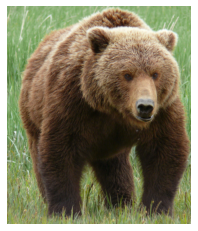

In [231]:
show_image(im.permute(1,2,0));

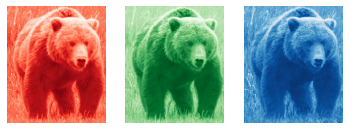

In [232]:
_,axs = plt.subplots(1,3)
for bear,ax,color in zip(im,axs,('Reds','Greens','Blues')): show_image(255-bear, ax=ax, cmap=color)